# Project 1 Portfolio Analyzer Consumer Stocks VS. Tech Stocks

We will be projecting future returns of a portfolio comprised of five consumer stocks as well as a a portfolio comprised of 5 tech stocks over a 15 and 20 year period in order to evaluate the better long term buy. The asset allocation between between stocks and bonds will remain the same between both portfolios.


The Stocks we will be analyzing are 

# Consumer Stocks:             

* P&G
* Johnson and Johnson
* Walmart
* Kellogg
* Coca Cola

# Tech Stocks:

* Amazon 
* Meta
* Google
* Tesla
* NVIDIA



In [1]:
# Import libraries and dependecies 
import pandas as pd
import yfinance as yf
from pathlib import Path

## Cost Basis: $50,000

In [2]:
# Import csv file and read it as a pandas dataframe
# 
all_stocks = pd.read_csv('Resources/stocks.csv', header=1)
all_stocks= all_stocks.iloc[:, 0:11]
all_stocks = all_stocks.rename(columns={"Unnamed: 0":"Date"})
all_stocks = all_stocks.drop(all_stocks.index[0])
all_stocks = all_stocks.set_index("Date")
all_stocks = all_stocks.fillna(0)
all_stocks.head()

,AMZN,GOOGL,JNJ,K,KO,META,NVDA,PG,TSLA,WMT
Date,,,,,,,,,,
2005-01-03,2.2260,5.072823,37.560459,25.440716,11.964918,0.0,1.803077,33.111019,0.0,36.303001
2005-01-04,2.1070,4.867367,37.441036,25.348944,11.797857,0.0,1.718199,32.697056,0.0,36.214558
2005-01-05,2.0885,4.842593,37.417152,25.503796,11.743134,0.0,1.734257,33.039040,0.0,36.262188
2005-01-06,2.0525,4.718468,37.524647,25.538210,11.841063,0.0,1.717435,33.201015,0.0,36.779327
2005-01-07,2.1160,4.851101,37.387299,25.354683,11.855463,0.0,1.684554,33.548973,0.0,36.738506


In [3]:
tech_stocks = all_stocks.loc[:, ['AMZN', 'GOOGL','META','NVDA','TSLA']]
tech_stocks.head()

,AMZN,GOOGL,META,NVDA,TSLA
Date,,,,,
2005-01-03,2.2260,5.072823,0.0,1.803077,0.0
2005-01-04,2.1070,4.867367,0.0,1.718199,0.0
2005-01-05,2.0885,4.842593,0.0,1.734257,0.0
2005-01-06,2.0525,4.718468,0.0,1.717435,0.0
2005-01-07,2.1160,4.851101,0.0,1.684554,0.0


In [4]:
consumer_stocks = all_stocks.loc[:, ['JNJ','K','KO','PG','WMT']]
consumer_stocks.head()

,JNJ,K,KO,PG,WMT
Date,,,,,
2005-01-03,37.560459,25.440716,11.964918,33.111019,36.303001
2005-01-04,37.441036,25.348944,11.797857,32.697056,36.214558
2005-01-05,37.417152,25.503796,11.743134,33.039040,36.262188
2005-01-06,37.524647,25.538210,11.841063,33.201015,36.779327
2005-01-07,37.387299,25.354683,11.855463,33.548973,36.738506


<AxesSubplot:title={'center':'Share Price from 2005 to 2023'}, xlabel='Date', ylabel='Share Price'>

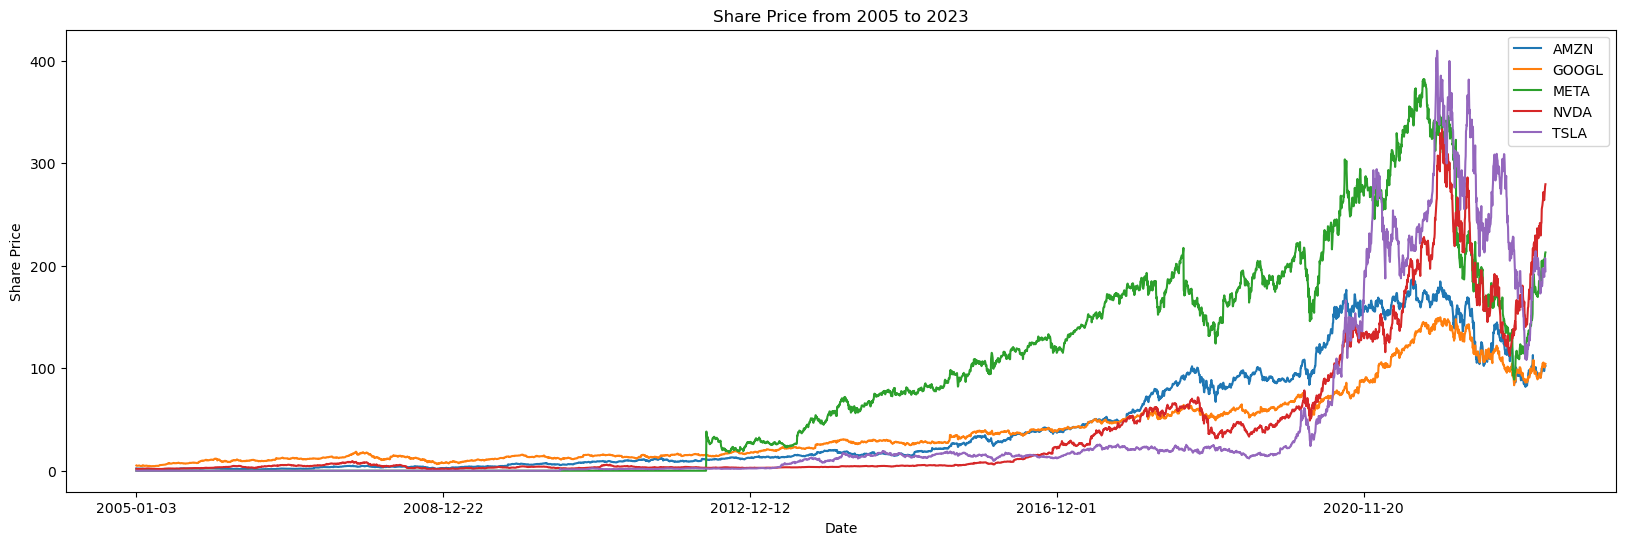

In [5]:
tech_stocks.plot(figsize=(20,6), title='Share Price from 2005 to 2023', legend=True, ylabel= "Share Price")

<AxesSubplot:title={'center':'Share Price from 2005 to 2023'}, xlabel='Date', ylabel='Share Price'>

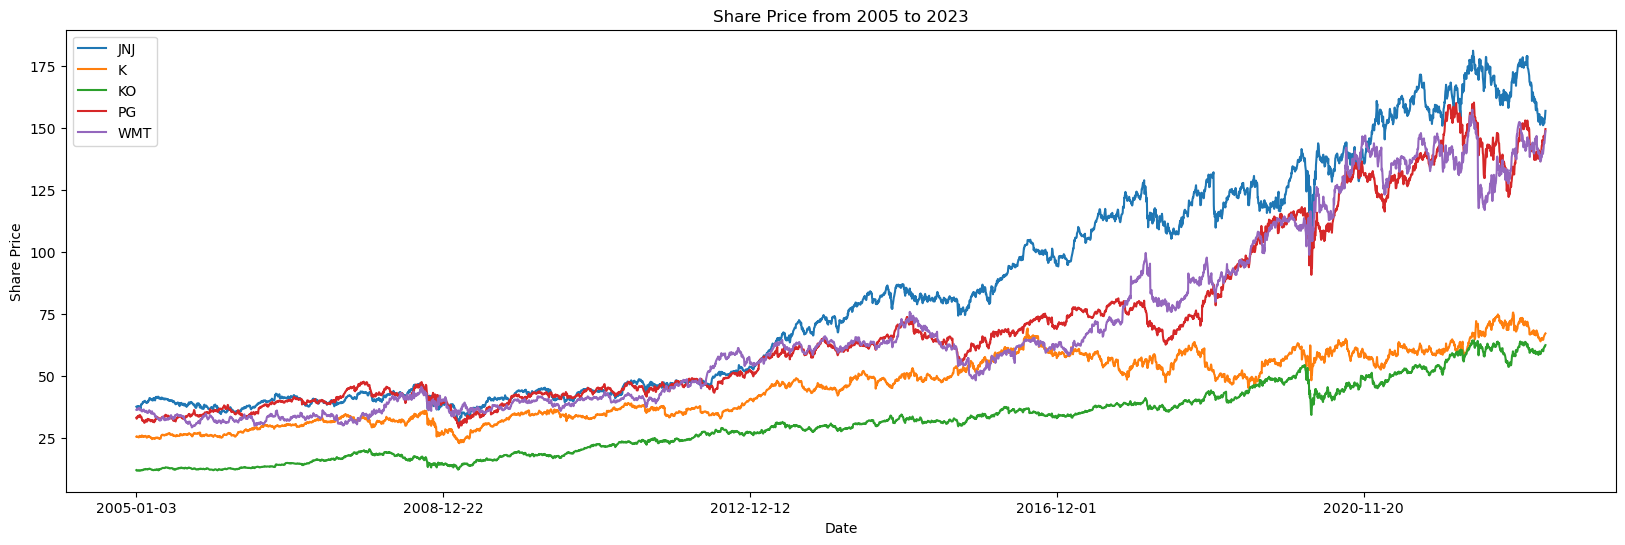

In [6]:
consumer_stocks.plot(figsize=(20,6), title='Share Price from 2005 to 2023', legend=True, ylabel= "Share Price")

In [7]:
print(tech_stocks.head())
daily_returns_tech_stocks = tech_stocks.pct_change()
daily_returns_tech_stocks = daily_returns_tech_stocks.fillna(0)
print(daily_returns_tech_stocks.head())
daily_returns_11_year_tech = daily_returns_tech_stocks.loc["2012-05-18":"2023-04-03"]
daily_returns_11_year_tech.describe()

              AMZN     GOOGL  META      NVDA  TSLA
Date                                              
2005-01-03  2.2260  5.072823   0.0  1.803077   0.0
2005-01-04  2.1070  4.867367   0.0  1.718199   0.0
2005-01-05  2.0885  4.842593   0.0  1.734257   0.0
2005-01-06  2.0525  4.718468   0.0  1.717435   0.0
2005-01-07  2.1160  4.851101   0.0  1.684554   0.0
                AMZN     GOOGL  META      NVDA  TSLA
Date                                                
2005-01-03  0.000000  0.000000   0.0  0.000000   0.0
2005-01-04 -0.053459 -0.040501   0.0 -0.047074   0.0
2005-01-05 -0.008780 -0.005090   0.0  0.009346   0.0
2005-01-06 -0.017237 -0.025632   0.0 -0.009700   0.0
2005-01-07  0.030938  0.028109   0.0 -0.019146   0.0


,AMZN,GOOGL,META,NVDA,TSLA
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,0.001027,0.000840,inf,0.002053,0.002334
std,0.020436,0.017091,NaN,0.027746,0.035940
min,-0.140494,-0.116341,-0.263901,-0.187559,-0.210628
25%,-0.008720,-0.007048,-0.010112,-0.010999,-0.015119
50%,0.000909,0.000763,0.000922,0.001924,0.001389
75%,0.011224,0.009188,0.012763,0.015072,0.019261
max,0.141311,0.162584,inf,0.298067,0.243951


In [8]:
print(consumer_stocks.head())
daily_returns_consumer_stocks = consumer_stocks.pct_change()
daily_returns_consumer_stocks = daily_returns_consumer_stocks.fillna(0)
print(daily_returns_consumer_stocks.head())
daily_returns_18_year_consumer = daily_returns_consumer_stocks.loc["2005-01-03":"2023-04-03"]
daily_returns_18_year_consumer.describe()

                  JNJ          K         KO         PG        WMT
Date                                                             
2005-01-03  37.560459  25.440716  11.964918  33.111019  36.303001
2005-01-04  37.441036  25.348944  11.797857  32.697056  36.214558
2005-01-05  37.417152  25.503796  11.743134  33.039040  36.262188
2005-01-06  37.524647  25.538210  11.841063  33.201015  36.779327
2005-01-07  37.387299  25.354683  11.855463  33.548973  36.738506
                 JNJ         K        KO        PG       WMT
Date                                                        
2005-01-03  0.000000  0.000000  0.000000  0.000000  0.000000
2005-01-04 -0.003179 -0.003607 -0.013963 -0.012502 -0.002436
2005-01-05 -0.000638  0.006109 -0.004638  0.010459  0.001315
2005-01-06  0.002873  0.001349  0.008339  0.004903  0.014261
2005-01-07 -0.003660 -0.007186  0.001216  0.010480 -0.001110


,JNJ,K,KO,PG,WMT
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,0.000370,0.000286,0.000428,0.000395,0.000389
std,0.010834,0.012199,0.011684,0.011543,0.012822
min,-0.100379,-0.109194,-0.096725,-0.087374,-0.113758
25%,-0.004549,-0.005373,-0.004815,-0.004793,-0.005705
50%,0.000256,0.000481,0.000496,0.000429,0.000471
75%,0.005667,0.006171,0.005894,0.005888,0.006428
max,0.122292,0.106458,0.138795,0.120091,0.117085


<AxesSubplot:title={'center':'Large Cap Tech Stocks Cumulative Returns from 2005-2023'}, xlabel='Date'>

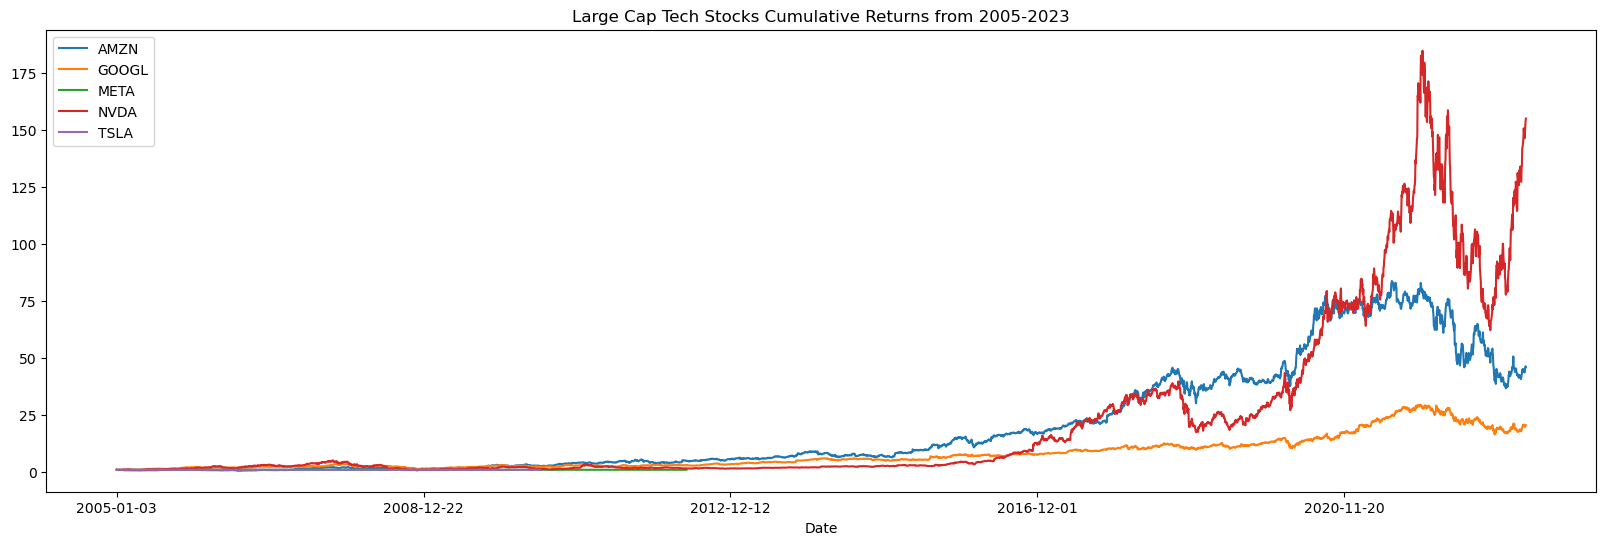

In [9]:
cumulative_returns_tech = (1 + daily_returns_tech_stocks).cumprod()
cumulative_returns_tech.plot(figsize=(20,6), title="Large Cap Tech Stocks Cumulative Returns from 2005-2023")

<AxesSubplot:title={'center':'Large Cap Consumer Stocks Cumulative Returns from 2005-2023'}, xlabel='Date'>

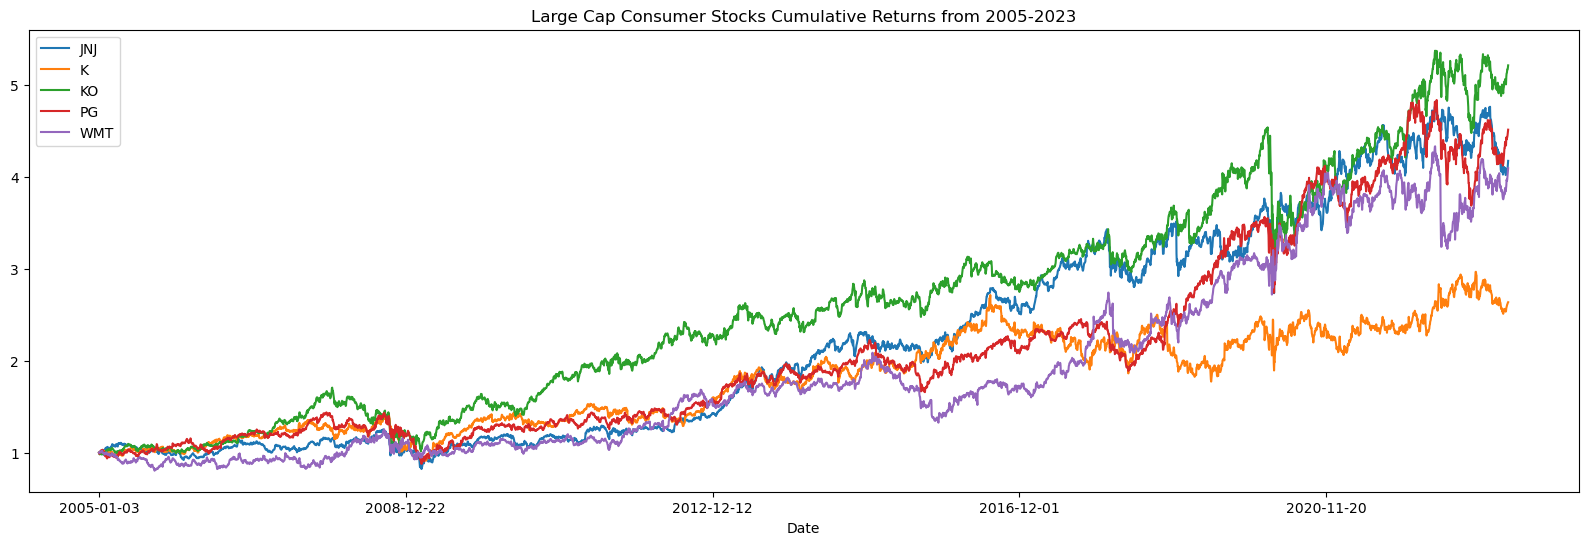

In [10]:
cumulative_returns_consumer = (1 + daily_returns_consumer_stocks).cumprod()
cumulative_returns_consumer.plot(figsize=(20,6), title="Large Cap Consumer Stocks Cumulative Returns from 2005-2023")

## TASKS:
## Overlay Cumulative Return Plots
## Calculate Variance, Covariance Beta, Rolling Metrics
## Set Asset Allocations for both portfolios as of 12_12_2012
## Run Monte Carlo Simulations for both portfolios
## Summary Statistics
## Calculate Performance Metrics
## Analysis

## Portfolio C: Which 5 stocks out of these 10 would give the highest risk-adjusted return? (Highest Ratios)